In [1]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
from sklearn.model_selection import train_test_split
from regression_dsets_large_names import regression_dsets_large_names
import numpy as np
import matplotlib.pyplot as plt
import pmlb
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
import data
import fit
import numpy.linalg as npl
from scipy.optimize import minimize
from process_results import process_results, aggregate_results, best_ridge

%matplotlib inline
%load_ext autoreload
%autoreload 2

parent_dir = '/scratch/users/vision/yu_dl/raaz.rsk/mdl_sim_may/'
save_dir = 'results'

# basic loading

In [ ]:
print(os.listdir(parent_dir))
out_dir = oj(parent_dir, 'mdl') # basic, pmlb_0, clustered, pmlb_1
fnames = sorted([oj(out_dir, fname) for fname in os.listdir(out_dir)])
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in tqdm(fnames) 
                if not 'processed' in fname]
results = pd.concat(results_list, axis=1).T.infer_objects()

In [ ]:
r = results
r = r[r.model_type == 'mdl']
rr = results[results.model_type == 'ridge']
R, C = 1, 2
plt.figure(dpi=200)

plt.subplot(R, C, 1)
plt.plot(1/r.n_train_over_num_features, r.test_mse, '.', label='mdl')
plt.plot(1/rr.n_train_over_num_features, rr.test_mse, '.', label='ridge')
plt.xscale('log')
plt.xlabel('p/n')
plt.ylabel('test mse')
plt.yscale('log')

plt.subplot(R, C, 2)
plt.plot(1/r.n_train_over_num_features, r.train_mse, '.', label='mdl')
plt.plot(1/rr.n_train_over_num_features, rr.train_mse, '.', label='ridge')
plt.xscale('log')
plt.xlabel('p/n')
plt.yscale('log')
plt.ylabel('train mse')
plt.legend()
plt.tight_layout()
plt.show()

# load results from a directory
**note - this script aggregates results - needs to be done to average across trials to make double descent curves**

In [ ]:
!rm /scratch/users/vision/yu_dl/raaz.rsk/mdl_sim_may/*/*processed*
!python process_results.py

In [6]:
os.makedirs(save_dir, exist_ok=True)
# parent_dir = '/scratch/users/vision/yu_dl/raaz.rsk/double_descent/df' # basic, pmlb_0, clustered, pmlb_1
# parent_dir = '/scratch/users/vision/yu_dl/raaz.rsk/mdl_sim_full' # basic, pmlb_0, clustered, pmlb_1
folders = os.listdir(parent_dir)
print(folders)
folders = [f for f in folders if 'may11' in f]

['t', 'pmlb0', 'may11gaussian_scale_var', 'may11thresh', 'may11clustered', 'iid', 'thresh', 'pmlb3', 'bignoise', 'may11t', 'pmlb4', 'decay2', 'gaussian_scale_var', 'decay', 'clustered', 'pmlb1', 'may11iid', 'pmlb5', 'may11decay', 'pmlb2']


# double-descent plots

0it [00:00, ?it/s]/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
7it [00:00, 190.69it/s]
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an a

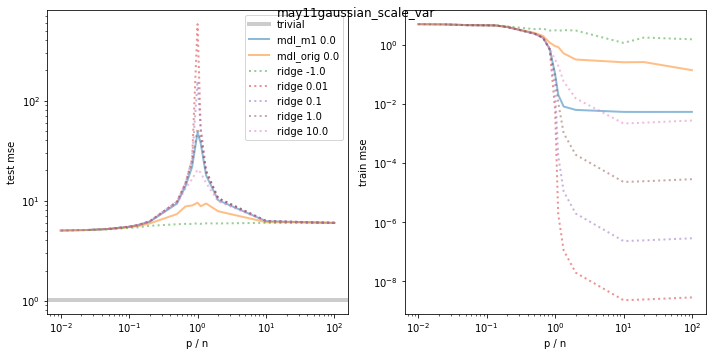

0it [00:00, ?it/s]/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
7it [00:00, 209.78it/s]
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an a

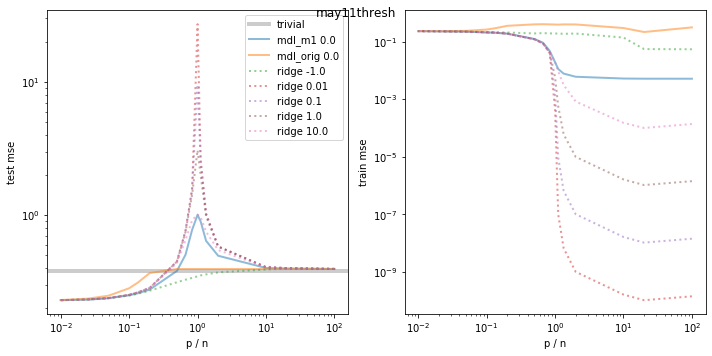

0it [00:00, ?it/s]/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
7it [00:00, 193.33it/s]
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an a

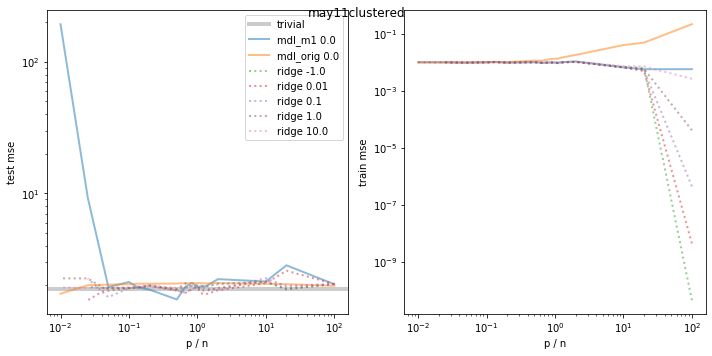

0it [00:00, ?it/s]/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
7it [00:00, 207.16it/s]
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an a

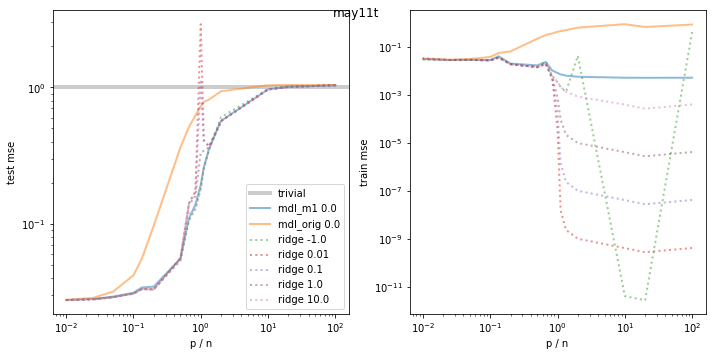

0it [00:00, ?it/s]/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
7it [00:00, 207.16it/s]
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an a

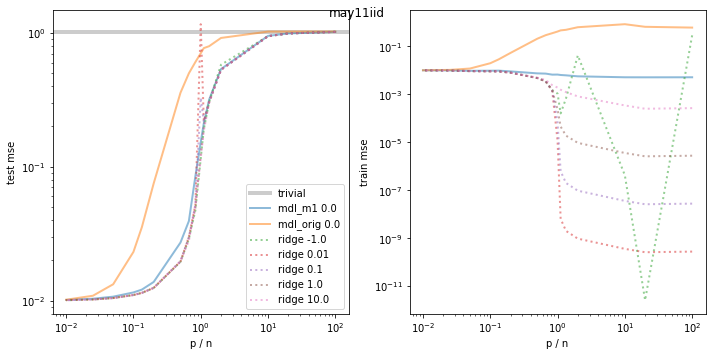

0it [00:00, ?it/s]/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
7it [00:00, 210.44it/s]
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an a

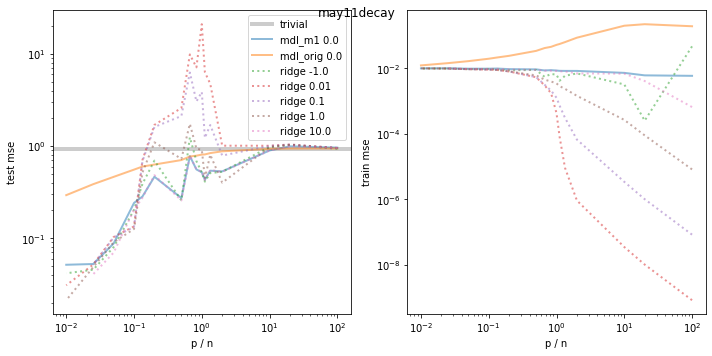

In [7]:
plot_all = False
for folder in folders:
    out_dir = oj(parent_dir, folder)
    df = pd.read_pickle(oj(out_dir, 'processed.pkl'))
        
    if plot_all:
        R, C = 2, 3
    else:
        R, C = 1, 2
    SIZE = 5
    plt.figure(figsize=(C * SIZE, R * SIZE))
    plt.subplot(R, C, 1)
    plt.axhline(df.mse_zero.values[0], lw=4, color='gray', alpha=0.4, label='trivial')
    for name, curve in tqdm(df.iterrows()):
    #     print(name, curve)
        model_type = name[3]
        reg_param = name[4]
        l = str(model_type) + ' ' + str(reg_param)
        if model_type == 'ols':
            ls = '--'
        elif model_type == 'ridge':
            ls = ':'
        elif model_type == 'linear_sta':
            ls = '-.'
        elif model_type == 'lasso':
            ls = ':'
        elif 'mdl' in model_type:
            ls = '-'
            
        if not model_type == 'linear_sta':


            kwargs = {'label': l, 'alpha': 0.5, 'lw': 2, 'linestyle': ls}

            plt.subplot(R, C, 1)
        #     plt.plot(curve.ratio, curve.mse_test, 
            plt.plot(curve.ratio, curve.mse_test, **kwargs) #np.square(curve.bias) + curve['var'], **kwargs)
            plt.ylabel('test mse')
            plt.xlabel('p / n')

            plt.subplot(R, C, 2)
            plt.plot(curve.ratio, curve.mse_train, **kwargs)
            plt.ylabel('train mse')
            plt.xlabel('p / n')


            if plot_all:
                row_best_ridge = best_ridge(df) # contains df1, df2, df3
                len_ridge = row_best_ridge.df1.size                
                
                plt.subplot(R, C, 4)
                plt.plot(row_best_ridge.df1, curve.mse_noiseless[:len_ridge], **kwargs)
                plt.ylabel('test mse')
                plt.xlabel('df1: $tr(S S^T)$')

                plt.subplot(R, C, 5)
                plt.plot(row_best_ridge.df2, curve.mse_noiseless[:len_ridge], **kwargs)
                plt.ylabel('test mse')
                plt.xlabel('df2: $tr(2 * S - S^T S)$')

                plt.subplot(R, C, 6)
                plt.plot(row_best_ridge.df3, curve.mse_noiseless[:len_ridge], **kwargs)
                plt.ylabel('test mse')
                plt.xlabel('df3: $tr(S)$')


            '''
            plt.subplot(R, C, 3)
            plt.plot(curve.ratio, np.square(curve.bias), **kwargs)
            plt.ylabel('bias')

            plt.subplot(R, C, 4)
            plt.plot(curve.ratio, curve['var'], **kwargs)
            plt.ylabel('var')
            '''

            '''
            # wnorm also recorded
            plt.subplot(R, C, 3)
            plt.plot(curve.ratio, curve['wnorm'], **kwargs)
            plt.ylabel('wnorm')
            plt.xlabel('p / n')

            plt.subplot(R, C, 4)
            plt.plot(curve.ratio, curve['num_nonzero'], **kwargs)
            plt.ylabel('num_nonzero')
            plt.xlabel('p / n')
            '''

    for i in range(1, R * C + 1):
        plt.subplot(R, C, i)
        plt.xscale('log')
        plt.yscale('log')

    #     s = f'{model_type}_{dset}_{dset_name}+p={num_features}+lambda={reg_param}+noise_mult={noise_mult}'
    plt.subplot(R, C, 1)
    plt.legend()
    
    if plot_all:
        plt.subplot(R, C, 3)
        ratios = row_best_ridge.ratio
        n = 500 / ratios
        p = 0 * ratios + 500
        plt.plot(ratios, np.minimum(n, p), label='min(n, p)', alpha=0.5)
        plt.plot(ratios, row_best_ridge.df1, label='df1')
        plt.plot(ratios, row_best_ridge.df2, label='df2')
        plt.plot(ratios, row_best_ridge.df3, label='df3')
        plt.xlabel('p / n')
        plt.legend()
    
    
    s = folder
    plt.suptitle(s)
    plt.tight_layout()
    # plt.show()
    plt.savefig(oj(save_dir, s + '.pdf'))
    plt.show()
    plt.close()

In [19]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

**fig 1 - iid plot**

0it [00:00, ?it/s]/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same argum

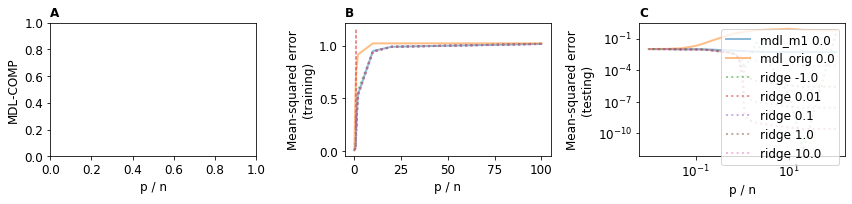

In [22]:
plot_all = False
R, C = 1, 3
SIZE = 5
plt.figure(figsize=(12, 3))
folder = 'may11iid'
out_dir = oj(parent_dir, folder)
df = pd.read_pickle(oj(out_dir, 'processed.pkl'))


plt.axhline(df.mse_zero.values[0], lw=4, color='gray', alpha=0.4, label='trivial')
for name, curve in tqdm(df.iterrows()):
#     print(name, curve)
    model_type = name[3]
    reg_param = name[4]
    l = str(model_type) + ' ' + str(reg_param)
    if model_type == 'ols':
        ls = '--'
    elif model_type == 'ridge':
        ls = ':'
    elif 'mdl' in model_type:
        ls = '-'

    if not model_type == 'linear_sta':
        kwargs = {'label': l, 'alpha': 0.5, 'lw': 2, 'linestyle': ls}

    #     plt.plot(curve.ratio, curve.mse_test, 
        plt.subplot(R, C, 1)
        plt.title('A', fontweight='bold', loc='left')
#         plt.plot(curve.loss_val, curve.mse_test, **kwargs) #np.square(curve.bias) + curve['var'], **kwargs)
        plt.ylabel('MDL-COMP')
        plt.xlabel('p / n') #\n(Number of features / Number of training points)')
    
        plt.subplot(R, C, 2)
        plt.title('B', fontweight='bold', loc='left')
        plt.plot(curve.ratio, curve.mse_test, **kwargs) #np.square(curve.bias) + curve['var'], **kwargs)
        plt.ylabel('Mean-squared error\n(training)')
        plt.xlabel('p / n') #\n(Number of features / Number of training points)')

        plt.subplot(R, C, 3)
        plt.title('C', fontweight='bold', loc='left')
        plt.plot(curve.ratio, curve.mse_train, **kwargs)
        plt.ylabel('Mean-squared error\n(testing)')
        plt.xlabel('p / n')
    plt.xscale('log')
    plt.yscale('log')

    #     s = f'{model_type}_{dset}_{dset_name}+p={num_features}+lambda={reg_param}+noise_mult={noise_mult}'
    plt.legend()
plt.tight_layout()
plt.savefig(oj(save_dir, 'fig_iid.pdf'))
plt.show()

**fig 2 - other shifts**

7it [00:00, 463.50it/s]
6it [00:00, 488.20it/s]
7it [00:00, 472.10it/s]


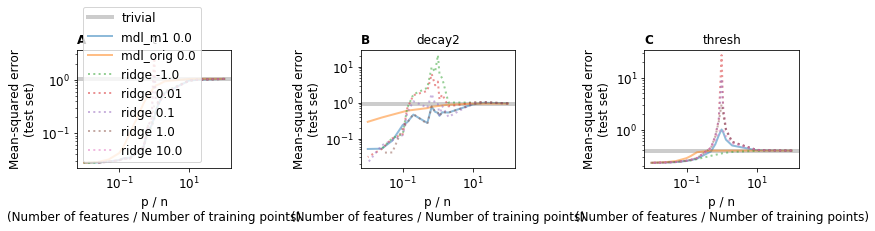

In [23]:
plot_all = False
R, C = 1, 3
lets = ['A', 'B', 'C', 'D', 'E']
plt.figure(figsize=(12, 3))
for i, folder in enumerate(['t', 'decay2', 'thresh']):
    plt.subplot(R, C, i + 1)
    plt.title(lets[i], fontweight='bold', loc='left')    
    out_dir = oj(parent_dir, folder)
    df = pd.read_pickle(oj(out_dir, 'processed.pkl'))

    SIZE = 5
    
    plt.axhline(df.mse_zero.values[0], lw=4, color='gray', alpha=0.4, label='trivial')
    for name, curve in tqdm(df.iterrows()):
    #     print(name, curve)
        model_type = name[3]
        reg_param = name[4]
        l = str(model_type) + ' ' + str(reg_param)
        if model_type == 'ols':
            ls = '--'
        elif model_type == 'ridge':
            ls = ':'
        elif model_type == 'linear_sta':
            ls = '-.'
        elif model_type == 'lasso':
            ls = ':'
        elif 'mdl' in model_type:
            ls = '-'
            
        if not model_type == 'linear_sta':

            kwargs = {'label': l, 'alpha': 0.5, 'lw': 2, 'linestyle': ls}

        #     plt.plot(curve.ratio, curve.mse_test, 
            plt.plot(curve.ratio, curve.mse_test, **kwargs) #np.square(curve.bias) + curve['var'], **kwargs)
            plt.ylabel('Mean-squared error\n(test set)')
            plt.xlabel('p / n\n(Number of features / Number of training points)')
    plt.xscale('log')
    plt.yscale('log')

    #     s = f'{model_type}_{dset}_{dset_name}+p={num_features}+lambda={reg_param}+noise_mult={noise_mult}'
    if i == 0:
        plt.legend()
    
    plt.title(folder)
plt.tight_layout()
plt.savefig(oj(save_dir, 'fig_shifts.pdf'))
plt.show()

# misc

u shape y shape (200, 200) (200,)
(100,) 100 100


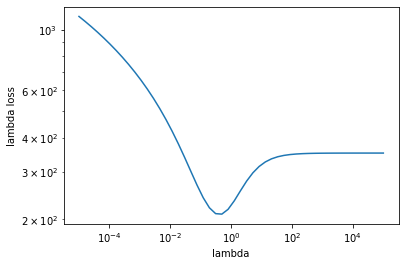

In [49]:
np.random.seed(42)
class p:
    n_train = 200
    num_features = 100
    noise_mult = 0.2
X_train = np.random.randn(p.n_train, p.num_features)
y_train = X_train[:, 0] + X_train[:, 1] + np.random.randn(p.n_train) * p.noise_mult

def lambda_loss(l):
    return np.sum(np.square(a) / (1 + np.square(sv) / l) + np.log(1 + np.square(sv) / l))
U, sv, Vh = npl.svd(X_train / np.sqrt(p.n_train))
print('u shape', 'y shape', U.shape, y_train.shape)
a = U.T @ y_train # / (np.sqrt(p.n_train)) #  np.sqrt(p.noise_mult)
a = a[:sv.size]
print(a.shape, a.size, sv.size)


ls = np.logspace(-5, 5)
plt.loglog(ls, [lambda_loss(l) for l in ls])
plt.ylabel('lambda loss')
plt.xlabel('lambda')
plt.show()

In [52]:
class s:
    pass
s.lambda_opt = minimize(lambda_loss, x0=1e-10).x
inv = npl.pinv(X_train.T @ X_train / p.n_train + s.lambda_opt * np.eye(p.num_features))
s.w = inv @ X_train.T @ y_train / p.n_train

In [54]:
minimize(lambda_loss, x0=1e-10).fun

208.19070669506894